In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)

In [2]:
stats = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/stats.csv", index_col = 0)
type_chart = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/Pokemon_Type_Chart.csv", index_col = 0)
details = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/data.csv", index_col = 0)
results = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/result.csv", index_col = 0)
details = details.merge(stats)
details = details.merge(results)

In [3]:
details["legendary"] = np.where(details["legendary"] == "Yes", 1, 0)
details["number"] = details["number"].str.replace("#0", "")
details[["type1", "type2"]] = details["type"].str.split(" / ", expand = True).fillna("Nil")

In [5]:
details.head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2
0,001,Bulbasaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.7,6.9,Medium Slow,Green,70.0,Seed Pokémon,1,No,45.0,49.0,49.0,65.0,65.0,45.0,318.0,270,755,Grass,Poison
1,002,Ivysaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.0,13.0,Medium Slow,Green,70.0,Seed Pokémon,1,No,60.0,62.0,63.0,80.0,80.0,60.0,405.0,437,588,Grass,Poison
2,003,Venusaur,Grass / Poison,Overgrow / Chlorophyll,Thick Fat,"87.5% male, 12.5% female",20cycles,Monster / Grass,236.0,2.0,100.0,Medium Slow,Green,70.0,Seed Pokémon,1,No,80.0,82.0,83.0,100.0,100.0,80.0,525.0,658,367,Grass,Poison
3,004,Charmander,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.6,8.5,Medium Slow,Red,70.0,Lizard Pokémon,1,No,39.0,52.0,43.0,60.0,50.0,65.0,309.0,200,825,Fire,Nil
4,005,Charmeleon,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,1.1,19.0,Medium Slow,Red,70.0,Flame Pokémon,1,No,58.0,64.0,58.0,80.0,65.0,80.0,405.0,394,631,Fire,Nil


In [6]:
if details["number"].iloc[0].startswith("#0"):
    print(True)

In [7]:
details.describe()

,Base_Experience_Yield,height,weight,base_friendship,gen,hp,attack,defense,special_attack,special_defense,speed,total,win,lose
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,151.089756,1.211317,66.977463,59.897561,4.741463,70.072195,77.380488,72.395122,69.959024,70.088780,67.127805,427.023415,481.060488,543.939512
std,79.022246,1.248299,121.277522,22.482942,2.633633,26.665218,29.723557,29.364210,29.637133,26.668189,28.654567,112.779018,240.703239,240.703239
min,36.000000,0.100000,0.100000,0.000000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,11.000000,54.000000
25%,66.000000,0.500000,8.500000,50.000000,3.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000,267.000000,347.000000
50%,158.000000,1.000000,28.000000,70.000000,5.000000,67.000000,75.000000,70.000000,65.000000,65.000000,65.000000,450.000000,509.000000,516.000000
75%,184.000000,1.500000,70.000000,70.000000,7.000000,85.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,678.000000,758.000000
max,635.000000,20.000000,999.900000,140.000000,9.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,971.000000,1014.000000


In [8]:
details["type1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [78]:
def get_type_wise_result(details):
    types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
             'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
             'Dragon', 'Dark', 'Steel', 'Flying']

    result = []
    for i, type_ in enumerate(types):
        data = details[details["type"].str.contains(type_, case = False) == True]
        count = len(data)
        total = count * 1025
        wins = data["win"].sum()
        loses = data["lose"].sum()
        pct_wins = round(wins/total * 100, 2)
        pct_loses = round(loses/total * 100, 2)
        result.append({"type": type_, "number": count,"wins": wins, "loses": loses, 
                       "pct_wins": pct_wins, "pct_loses": pct_loses})
        
    return pd.DataFrame(result)

In [79]:
type_result = get_type_wise_result(details)
type_result = type_result.sort_values("pct_wins", ascending = False)
type_result.index = range(0, len(type_result))
type_result

,type,number,wins,loses,pct_wins,pct_loses
0,Dragon,70,45685,26065,63.67,36.33
1,Steel,65,41434,25191,62.19,37.81
2,Fighting,73,42830,31995,57.24,42.76
3,Dark,69,39589,31136,55.98,44.02
4,Ghost,65,36439,30186,54.69,45.31
5,Ice,48,26431,22769,53.72,46.28
6,Rock,74,39840,36010,52.52,47.48
7,Psychic,102,54469,50081,52.10,47.90
8,Electric,69,36750,33975,51.96,48.04
9,Ground,75,39776,37099,51.74,48.26


In [80]:
#details.nlargest(50, "win")

In [81]:
details["hp"].corr(details["win"])

np.float64(0.6565113686138544)

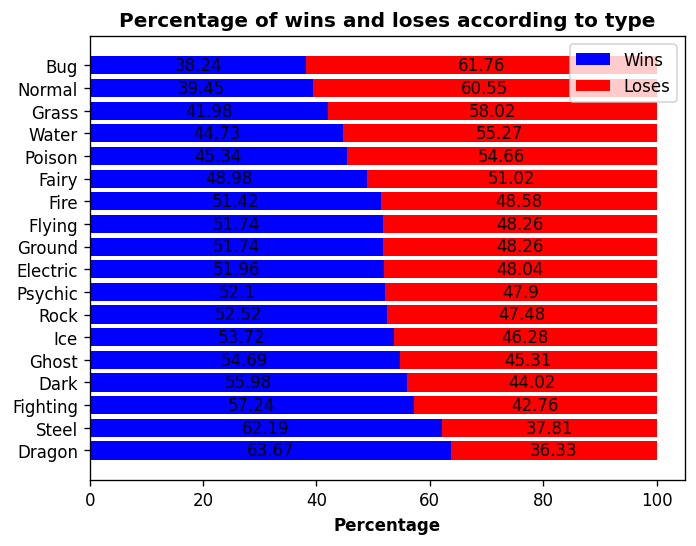

In [82]:
fig, ax = plt.subplots(dpi=120)
bars1 = ax.barh(type_result["type"], type_result["pct_wins"],
        color="b", label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(type_result["type"], type_result["pct_loses"],
         left=type_result["pct_wins"], color="r", label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.xlabel("Percentage", fontweight="bold")
plt.legend()
plt.title("Percentage of wins and loses according to type", fontweight = "bold")
plt.show()

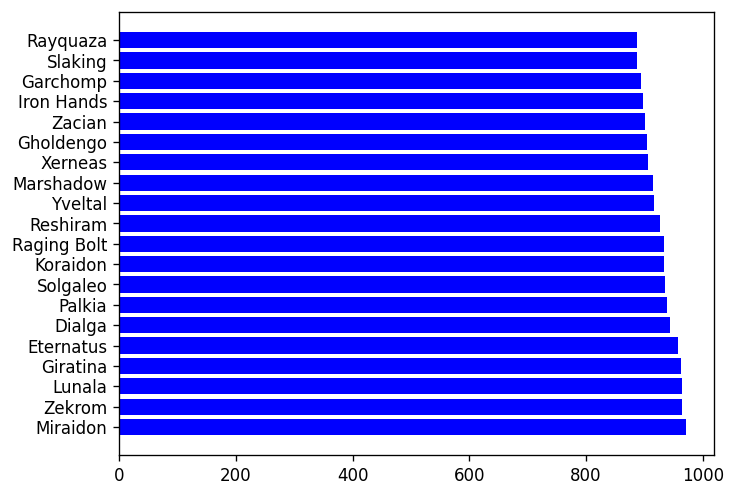

In [14]:
plt.figure(dpi = 120)
top_20_wins = details.nlargest(20, "win")
plt.barh(top_20_wins["name"], top_20_wins["win"], color = "b")
plt.show()

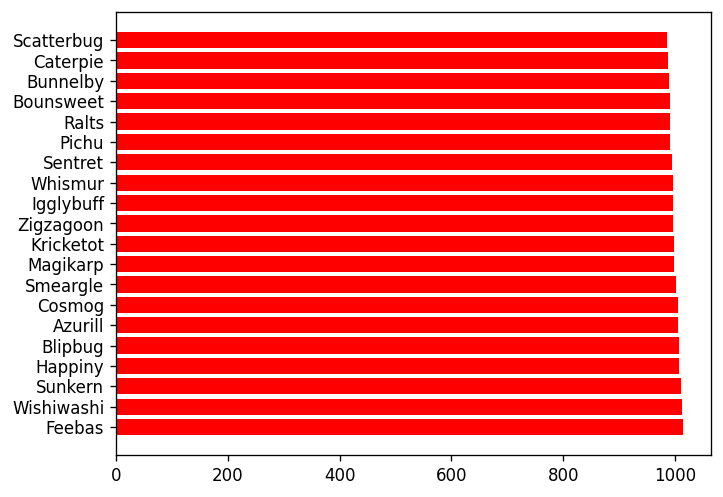

In [15]:
plt.figure(dpi = 120)
top_20_loses = details.nlargest(20, "lose")
plt.barh(top_20_loses["name"], top_20_loses["lose"], color = "r")
plt.show()

In [16]:
details[details["type"].str.contains("Fire") == True]["win"].sum()

np.int64(42688)

In [17]:
print(len(details[details["win"] < 512]))
print(len(details[details["win"] >= 512]))

520
505


In [19]:
details["legendary"] = np.where(details["legendary"] == "Yes", 1, 0)

In [5]:
needs = ['Base_Experience_Yield', 'height', 'weight',
        'base_friendship', 'gen',
       'legendary', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'total', 'win', 'lose']

In [21]:
details[needs].corr()

,Base_Experience_Yield,height,weight,base_friendship,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose
Base_Experience_Yield,1.000000,0.476226,0.433907,-0.335197,0.170967,0.465757,0.683652,0.620316,0.549325,0.643602,0.654099,0.513936,0.922539,0.878068,-0.878068
height,0.476226,1.000000,0.632504,-0.313313,0.052696,0.233596,0.483217,0.384335,0.348725,0.319507,0.276189,0.201393,0.506783,0.488327,-0.488327
weight,0.433907,0.632504,1.000000,-0.383344,0.111277,0.291249,0.476355,0.402339,0.447561,0.185233,0.265010,0.043313,0.457546,0.448926,-0.448926
base_friendship,-0.335197,-0.313313,-0.383344,1.000000,-0.407735,-0.327514,-0.174503,-0.307630,-0.228202,-0.243125,-0.163128,-0.230114,-0.342685,-0.328558,0.328558
gen,0.170967,0.052696,0.111277,-0.407735,1.000000,0.087991,0.121887,0.146967,0.099932,0.086569,0.065650,0.079556,0.152059,0.189822,-0.189822
legendary,0.465757,0.233596,0.291249,-0.327514,0.087991,1.000000,0.275212,0.276330,0.271141,0.352789,0.346021,0.308195,0.461332,0.382629,-0.382629
hp,0.683652,0.483217,0.476355,-0.174503,0.121887,0.275212,1.000000,0.480018,0.299119,0.356717,0.365108,0.179567,0.666531,0.656511,-0.656511
attack,0.620316,0.384335,0.402339,-0.307630,0.146967,0.276330,0.480018,1.000000,0.466646,0.286626,0.226016,0.353644,0.717170,0.725566,-0.725566
defense,0.549325,0.348725,0.447561,-0.228202,0.099932,0.271141,0.299119,0.466646,1.000000,0.208710,0.501515,0.007538,0.629432,0.642266,-0.642266
special_attack,0.643602,0.319507,0.185233,-0.243125,0.086569,0.352789,0.356717,0.286626,0.208710,1.000000,0.492095,0.423616,0.701008,0.652093,-0.652093


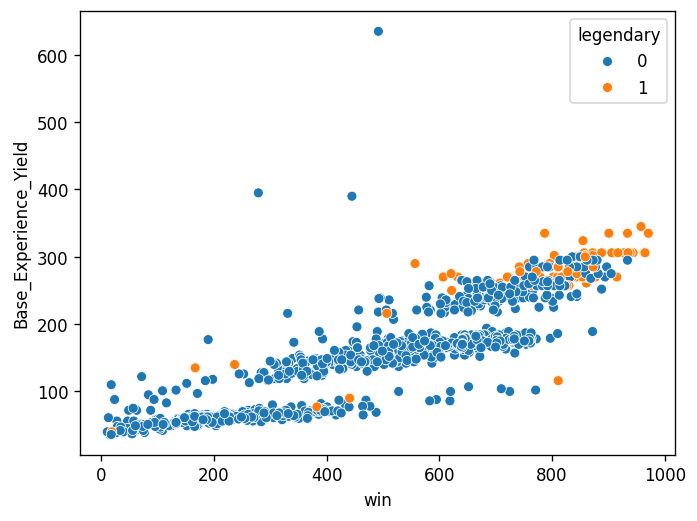

In [22]:
plt.figure(dpi = 120)
sns.scatterplot(y = details["Base_Experience_Yield"], x = details["win"],
               hue = details["legendary"])
plt.show()

0.9565219359201655


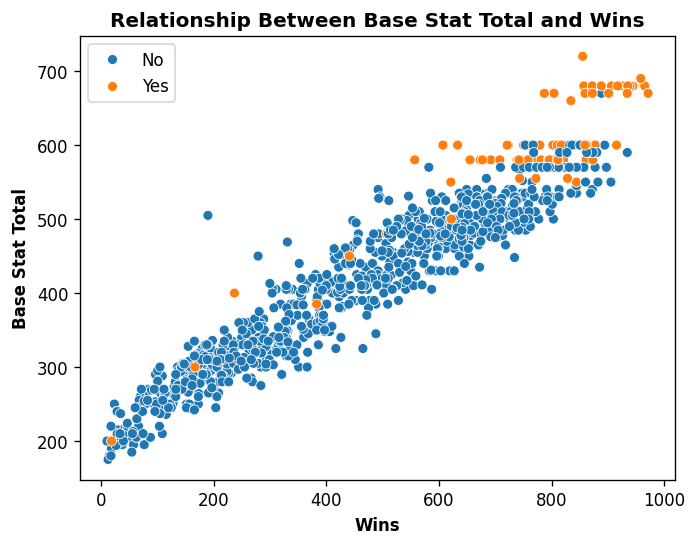

In [29]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["win"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Wins", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Wins", fontweight = "bold")
print(details["total"].corr(details["win"]))
plt.show()

-0.9565219359201655


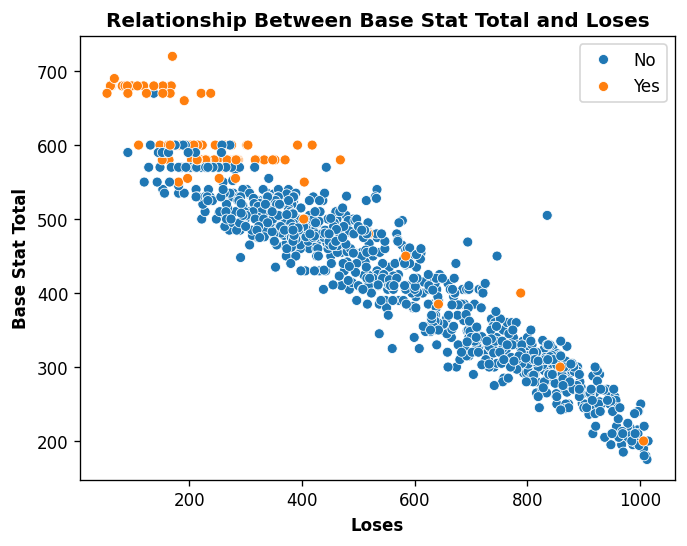

In [27]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["lose"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Loses", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Loses", fontweight = "bold")
print(details["total"].corr(details["lose"]))
plt.show()

In [60]:
ultra_beast = details[details["ability"].str.contains("Beast Boost") == True].nlargest(11, "win")
print(len(ultra_beast))

11


In [61]:
paradox = details[details["category"].str.contains("Paradox Pokémon") == True].nlargest(22, "win")
print(len(paradox))

22


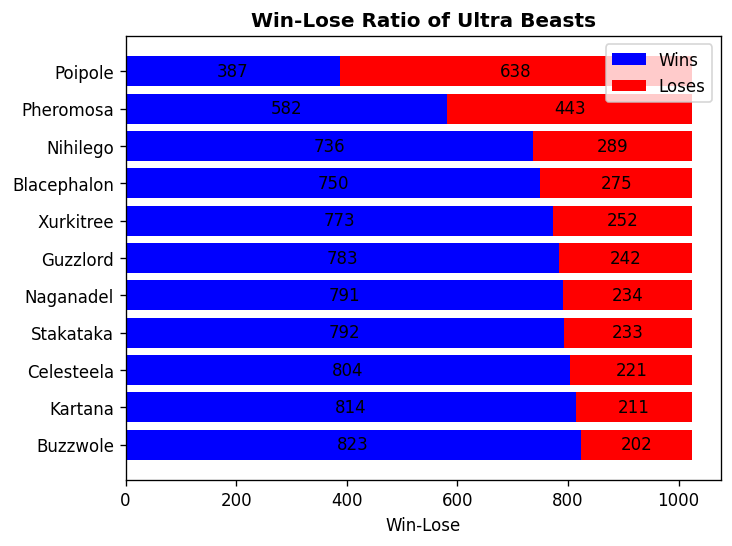

In [67]:
fig, ax = plt.subplots(dpi = 120)
bars1 = ax.barh(ultra_beast["name"], ultra_beast["win"], color="b",
        label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(ultra_beast["name"], ultra_beast["lose"], color="r", left = ultra_beast["win"],
        label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.title("Win-Lose Ratio of Ultra Beasts", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

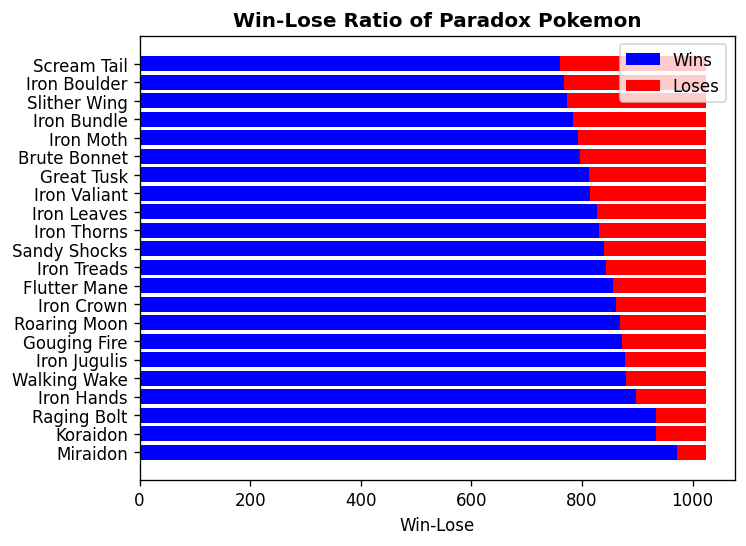

In [62]:
plt.figure(dpi = 120)
plt.barh(paradox["name"], paradox["win"], color="b",
        label="Wins")
plt.barh(paradox["name"], paradox["lose"], color="r", left = paradox["win"],
        label="Loses")
plt.title("Win-Lose Ratio of Paradox Pokemon", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

In [6]:
starters = ["Bulbasaur","Charmander","Squirtle","Chikorita",
            "Cyndaquil","Totodile","Treecko","Torchic","Mudkip",
            "Turtwig","Chimchar","Piplup","Snivy","Tepig","Oshawott",
            "Chespin","Fennekin", "Froakie","Rowlet","Litten",
            "Popplio", "Grookey","Scorbunny","Sobble",
            "Sprigatito","Fuecoco", "Quaxly"]

In [7]:
def get_starter_data(starters, details):
    for i, name in enumerate(starters):
        if ((details["name"].str.contains(name)).sum() == 1) & (i < 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            data_final = details.loc[[num+2], :]
            starter_data = data
            starter_final = data_final
        elif ((details["name"].str.contains(name)).sum() == 1) & (i >= 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            data_final = details.loc[[num+2], :]
            starter_data = pd.concat([starter_data, data])
            starter_final = pd.concat([starter_final, data_final])
    return starter_data, starter_final

In [8]:
starter_data, starter_final = get_starter_data(starters, details)

In [9]:
starter_data.index = range(0, len(starter_data))

(starter_final.nlargest(27, "win")[["name", "win"]])
starter_data["stage"] = (starter_data.index % 3) + 1
# starter_data.loc[np.array(starter_data.index)[np.arange(0,81,3)], "stage"] = 1
# starter_data.loc[np.array(starter_data.index)[np.arange(1,81,3)], "stage"] = 2
# starter_data.loc[np.array(starter_data.index)[np.arange(2,81,3)], "stage"] = 3

In [11]:
starter_data.tail()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,stage
76,910,Crocalor,Fire,Blaze,Unaware,"87.5% male, 12.5% female",20cycles,Field,144.0,1.0,30.7,Medium Slow,Red,50.0,Fire Croc Pokémon,9,0,81.0,55.0,78.0,90.0,58.0,49.0,411.0,490,535,Fire,Nil,2
77,911,Skeledirge,Fire / Ghost,Blaze,Unaware,"87.5% male, 12.5% female",20cycles,Field,265.0,1.6,326.5,Medium Slow,Red,50.0,Singer Pokémon,9,0,104.0,75.0,100.0,110.0,75.0,66.0,530.0,813,212,Fire,Ghost,3
78,912,Quaxly,Water,Torrent,Moxie,"87.5% male, 12.5% female",20cycles,Flying / Water 1,62.0,0.5,6.1,Medium Slow,Blue,50.0,Duckling Pokémon,9,0,55.0,65.0,45.0,50.0,45.0,50.0,310.0,189,836,Water,Nil,1
79,913,Quaxwell,Water,Torrent,Moxie,"87.5% male, 12.5% female",20cycles,Flying / Water 1,144.0,1.2,21.5,Medium Slow,Blue,50.0,Practicing Pokémon,9,0,70.0,85.0,65.0,65.0,60.0,65.0,410.0,400,625,Water,Nil,2
80,914,Quaquaval,Water / Fighting,Torrent,Moxie,"87.5% male, 12.5% female",20cycles,Flying / Water 1,265.0,1.8,61.9,Medium Slow,Blue,50.0,Dancer Pokémon,9,0,85.0,120.0,80.0,85.0,75.0,85.0,530.0,734,291,Water,Fighting,3


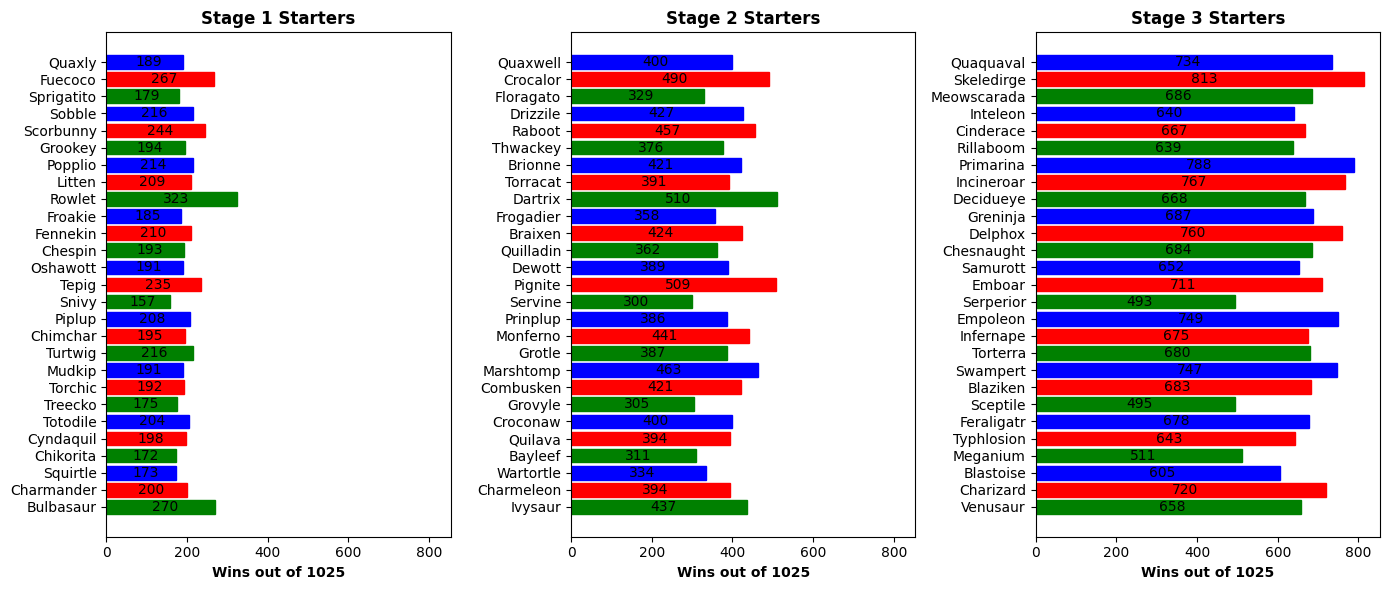

In [57]:
bar_colors = ["green", "red", "blue"]
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True,
                                   figsize = (14,6))

for stage, ax in enumerate(axes, start=1):
    x = starter_data[starter_data["stage"] == stage]["name"]
    y = starter_data[starter_data["stage"] == stage]["win"]
    z = starter_data[starter_data["stage"] == stage]["lose"]
    bars = ax.barh(x, y, color = "blue")
    for i, bar in enumerate(bars):
        bar.set_color(bar_colors[i % 3])
    #ax1.barh(x, z, left = y, color = "red")
    ax.bar_label(bars, color="black", label_type="center", padding=3, fontsize=10)
    ax.set_xlabel("Wins out of 1025", fontweight = "bold")
    ax.set_title(f"Stage {stage} Starters", fontweight = "bold")

plt.tight_layout()
fig.savefig("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/graphs/starters_win.png")
plt.show()
